<div class="alert alert-block alert-success"> 
<h1>Task 3 - Continous distributions</h1>
</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Функция-для-нахождения-квантильных-рядов" data-toc-modified-id="Функция-для-нахождения-квантильных-рядов-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Функция для нахождения квантильных рядов</a></span></li><li><span><a href="#Генерация-выборок-распределений" data-toc-modified-id="Генерация-выборок-распределений-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Генерация выборок распределений</a></span></li><li><span><a href="#Создание-датафрейма-из-квантильных-значений-исследуемых-распределений" data-toc-modified-id="Создание-датафрейма-из-квантильных-значений-исследуемых-распределений-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Создание датафрейма из квантильных значений исследуемых распределений</a></span><ul class="toc-item"><li><span><a href="#Вариант-2-создания-датафрейма" data-toc-modified-id="Вариант-2-создания-датафрейма-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вариант 2 создания датафрейма</a></span></li></ul></li><li><span><a href="#Создание-колонок-с-разницей-квантильных-значений" data-toc-modified-id="Создание-колонок-с-разницей-квантильных-значений-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Создание колонок с разницей квантильных значений</a></span></li><li><span><a href="#Сравнение-Standard-normal-distribution-и-Student's-distribution-с-разной-степенью-свододы" data-toc-modified-id="Сравнение-Standard-normal-distribution-и-Student's-distribution-с-разной-степенью-свододы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Сравнение Standard normal distribution и Student's distribution с разной степенью свододы</a></span></li><li><span><a href="#Сравнение-Normal-distribution-и-Chi-squared-distribution--с-разной-степенью-свободы" data-toc-modified-id="Сравнение-Normal-distribution-и-Chi-squared-distribution--с-разной-степенью-свободы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Сравнение Normal distribution и Chi-squared distribution  с разной степенью свободы</a></span></li></ul></div>

Используйте функцию из **первого домашнего задания**, чтобы сравнить различные распределения с разными степенями свободы.

1. Сгенерируйте следующие выборки по 100 000 наблюдений:
    1. Нормальное стандартное распределение **n_stand.**
    2. Стьюдент с 5 степенями свободы **stud_5.**
    3. Стьюдент с 10 степенями свободы **stud_10.**
    4. Стьюдент со 100 степенями свободы **stud_100.**
    5. Нормальное распределение (5,10) **n_5_10.**
    6. Хи-квадрат с 5 степенями свободы **chi_5.**
    7. Нормальное распределение (10,20) **n_10_20.**
    8. Хи-квадрат с 10 степенями свободы **chi_10.**
    9. Нормальное распределение (100,200) **n_100_200.**
    10. Хи-квадрат со 100 степенями свободы **chi_100.**  
    
2. С помощью функции **statistical_analysis** найдите ряды квантильных значений (аргумент по умолчанию) для каждой из этих выборок.

3. Запишите полученные квантильные ряды в единый датафрейм.  

4. Создайте 3 колонки с разницей квантильных значений по следующим парам:
    - **n_stand vs stud_5,**
    - **n_stand vs stud_10,**
    - **n_stand vs stud_100.**  
    
5. Постройте с помощью **seaborn** график с тремя кривыми разниц и сделайте выводы о зависимости количества степеней свободы Стьюдента и близости двух распределений.  

6. С помощью seaborn постройте **гистограммы** (histplot), на которых изобразите следующие сравниваемые пары:
    - **n_5_10 vs chi_5,**
    - **n_10_20 vs chi_10,**
    - **n_100_200 vs chi_100.**  

7. Сделайте выводы о сходимости распределения хи-квадрат к нормальному в зависимости от степеней свободы хи-квадрата.

<div class="alert alert-block alert-info"> 
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random as rd
import statistics as st
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t

In [2]:
sample_size = 100000 # количество наблюдений

### Функция для нахождения квантильных рядов

In [3]:
def statistical_analysis (list_or_tuple_input, list_of_quantiles = [0.1,0.25,0.3,0.4,0.5,0.6,0.75,0.9]):
    """ Находит ряды квантильных значений.
    
    Parameters
    ----------
    list_or_tuple_input : list, tuple
        Выборка в формате «список» или «кортеж»
    list_of_quantiles : array_like of float, default [0.1,0.25,0.3,0.4,0.5,0.6,0.75,0.9]
        Квантиль или последовательность квантилей для вычисления,
        которые должны быть между 0 и 1 включительно 
        
    Returns
    -------
    pandas.core.frame.DataFrame
        индекс - наименование квантиля
        1 стоблец - соответствующее значение квантиля
    """
    series_input = pd.DataFrame(list_or_tuple_input, columns = ['row_elements']) # замена тип на pandas Series

# квантильный анализ:

    # подсчёт децилей
    array_of_deciles = np.quantile(series_input['row_elements'], list_of_quantiles)
    quantile_analysis_array = np.array(array_of_deciles) # начинаю наполнять массив NumPy

    # формирование списка подписей
    list_deciles_names = list(map(str,list_of_quantiles)) # список децилей
    list_column_names = ['decile_' + value_deciles for value_deciles in list_deciles_names] # добавление к значениям децилей

    # перевод array numpy в dataframe pandas
    quantile_analysis_df = pd.DataFrame(data = quantile_analysis_array, index = list_column_names, columns = ['quantile_value'])#.reset_index()
        
# возврат требуемых значений из функции   
    return quantile_analysis_df

### Генерация выборок распределений

In [4]:
# Генерация выборок распределений

n_stand = norm.rvs(0, 1, sample_size) # A. нормальное стандартное распределение
stud_5 = t.rvs(5, size=sample_size) # B. стьюдент с 5 степенями свободы
stud_10 = t.rvs(10, size=sample_size) # C. стьюдент с 10 степенями свободы
stud_100 = t.rvs(100, size=sample_size) # D. стьюдент с 100 степенями свободы
n_5_10 = norm.rvs(5, 10**(0.5), sample_size) # E. Нормальное распределение (5,10)
chi_5 = chi2.rvs(5, size=sample_size) # F. Хи-квадрат с 5 степенями свободы
n_10_20 = norm.rvs(10, 20**(0.5), sample_size) # G. Нормальное распределение (10, 20)
chi_10 = chi2.rvs(10, size=sample_size) # H. Хи-квадрат с 10 степенями свободы
n_100_200 = norm.rvs(100, 200**(0.5), sample_size) # I. Нормальное распределение (100, 200)
chi_100 = chi2.rvs(100, size=sample_size) # J. Хи-квадрат с 100 степенями свободы

### Создание датафрейма из квантильных значений исследуемых распределений

In [5]:
# Список распределений
list_samples = [n_stand, stud_5, stud_10, stud_100, n_5_10, chi_5, n_10_20, chi_10, n_100_200, chi_100]

In [6]:
# Наименование распределений
list_names_samples = ['n_stand', 'stud_5', 'stud_10', 'stud_100', 'n_5_10', 'chi_5', 'n_10_20', 'chi_10', 'n_100_200', 'chi_100']

In [7]:
# Построение dataframe квантильных значений распределений

quantile_dataframe_join = pd.DataFrame(statistical_analysis(n_stand)) # определение датафрейма + первый ряд

for i in list_samples: # заполнение датафрейма остальными рядами
    quantile_dataframe_join = quantile_dataframe_join.join(statistical_analysis(i), rsuffix='_right', how='inner')
    
quantile_dataframe_join = quantile_dataframe_join.drop(columns = ['quantile_value'], axis = 1) # удаление дублирующего ряда
quantile_dataframe_join.columns = list_names_samples # наименование колонок в соответствии с рядами выборок

In [8]:
quantile_dataframe_join

,n_stand,stud_5,stud_10,stud_100,n_5_10,chi_5,n_10_20,chi_10,n_100_200,chi_100
decile_0.1,-1.276690,-1.474309,-1.363980,-1.281667,0.969549,1.610859,4.294794,4.862554,81.841111,82.443576
decile_0.25,-0.667819,-0.721669,-0.696692,-0.674797,2.863087,2.677169,6.993741,6.741503,90.414014,90.097523
decile_0.3,-0.518968,-0.553811,-0.535579,-0.524641,3.328971,2.997976,7.674447,7.269254,92.538197,92.090632
decile_0.4,-0.253675,-0.266437,-0.259302,-0.259043,4.180752,3.655867,8.888991,8.299985,96.367680,95.774910
decile_0.5,-0.000404,-0.000173,0.000507,-0.000340,4.988237,4.347017,10.028772,9.349010,99.940494,99.356858
decile_0.6,0.253726,0.264944,0.259043,0.254563,5.780651,5.126039,11.131377,10.494590,103.549764,102.947090
decile_0.75,0.670573,0.733203,0.700603,0.669312,7.106351,6.630116,13.009581,12.570507,109.511066,109.087858
decile_0.9,1.286641,1.465175,1.385031,1.278572,9.048801,9.232965,15.715413,15.993952,118.083737,118.406033


#### Вариант 2 создания датафрейма

In [9]:
# Генерация выборок распределений + нахождение квантильных значений для них

n_stand_df = statistical_analysis(norm.rvs(0, 1, sample_size)) # A. нормальное стандартное распределение
stud_5_df = statistical_analysis(t.rvs(5, size=sample_size)) # B. стьюдент с 5 степенями свободы
stud_10_df = statistical_analysis(t.rvs(10, size=sample_size)) # C. стьюдент с 10 степенями свободы
stud_100_df = statistical_analysis(t.rvs(100, size=sample_size)) # D. стьюдент с 100 степенями свободы
n_5_10_df = statistical_analysis(norm.rvs(5, 10**(0.5), sample_size)) # E. Нормальное распределение (5,10)
chi_5_df = statistical_analysis(chi2.rvs(5, size=sample_size)) # F. Хи-квадрат с 5 степенями свободы
n_10_20_df = statistical_analysis(norm.rvs(10, 20**(0.5), sample_size)) # G. Нормальное распределение (10, 20)
chi_10_df = statistical_analysis(chi2.rvs(10, size=sample_size)) # H. Хи-квадрат с 10 степенями свободы
n_100_200_df = statistical_analysis(norm.rvs(100, 200**(0.5), sample_size)) # I. Нормальное распределение (100, 200)
chi_100_df = statistical_analysis(chi2.rvs(100, size=sample_size)) # J. Хи-квадрат с 100 степенями свободы

In [10]:
# Список распределений

list_samples_df = [n_stand_df, stud_5_df, stud_10_df, stud_100_df, n_5_10_df, chi_5_df, n_10_20_df, chi_10_df, n_100_200_df, chi_100_df]

In [11]:
quantile_dataframe_concat = pd.concat(list_samples_df, axis=1) # склеивает датафреймы квантильных значений распределений

In [12]:
quantile_dataframe_concat.columns = list_names_samples # именует колонки в соответствии с рядами выборок

In [13]:
quantile_dataframe_concat

,n_stand,stud_5,stud_10,stud_100,n_5_10,chi_5,n_10_20,chi_10,n_100_200,chi_100
decile_0.1,-1.281320,-1.477944,-1.358346,-1.296174,0.962479,1.604913,4.276836,4.872023,81.884155,82.407160
decile_0.25,-0.678743,-0.725936,-0.698868,-0.679796,2.865106,2.671082,6.962585,6.741670,90.379086,90.138889
decile_0.3,-0.525371,-0.559877,-0.538613,-0.526711,3.339176,2.997569,7.636452,7.277306,92.489060,92.143917
decile_0.4,-0.256873,-0.271929,-0.255109,-0.258147,4.194537,3.652010,8.844899,8.307157,96.368786,95.761798
decile_0.5,-0.003565,-0.008273,0.002630,-0.002916,4.995224,4.346967,9.997410,9.351251,99.917989,99.356168
decile_0.6,0.249518,0.261279,0.260083,0.249580,5.799591,5.128860,11.139171,10.482116,103.533945,102.926121
decile_0.75,0.670164,0.723238,0.703169,0.677110,7.150025,6.615135,13.017948,12.539420,109.527296,109.125222
decile_0.9,1.275590,1.461189,1.377579,1.292264,9.071388,9.254994,15.760434,16.000699,118.151325,118.471952


### Создание колонок с разницей квантильных значений

In [14]:
quantile_dataframe = quantile_dataframe_concat

quantile_dataframe['n_stand vs stud_5'] = (quantile_dataframe_concat['n_stand'] - quantile_dataframe_concat['stud_5']).abs()

quantile_dataframe['n_stand vs stud_10'] = (quantile_dataframe_concat['n_stand'] - quantile_dataframe_concat['stud_10']).abs()

quantile_dataframe['n_stand vs stud_100'] = (quantile_dataframe_concat['n_stand'] - quantile_dataframe_concat['stud_100']).abs()

quantile_dataframe

,n_stand,stud_5,stud_10,stud_100,n_5_10,chi_5,n_10_20,chi_10,n_100_200,chi_100,n_stand vs stud_5,n_stand vs stud_10,n_stand vs stud_100
decile_0.1,-1.281320,-1.477944,-1.358346,-1.296174,0.962479,1.604913,4.276836,4.872023,81.884155,82.407160,0.196624,0.077026,0.014853
decile_0.25,-0.678743,-0.725936,-0.698868,-0.679796,2.865106,2.671082,6.962585,6.741670,90.379086,90.138889,0.047193,0.020124,0.001053
decile_0.3,-0.525371,-0.559877,-0.538613,-0.526711,3.339176,2.997569,7.636452,7.277306,92.489060,92.143917,0.034506,0.013242,0.001340
decile_0.4,-0.256873,-0.271929,-0.255109,-0.258147,4.194537,3.652010,8.844899,8.307157,96.368786,95.761798,0.015056,0.001764,0.001274
decile_0.5,-0.003565,-0.008273,0.002630,-0.002916,4.995224,4.346967,9.997410,9.351251,99.917989,99.356168,0.004709,0.006194,0.000648
decile_0.6,0.249518,0.261279,0.260083,0.249580,5.799591,5.128860,11.139171,10.482116,103.533945,102.926121,0.011761,0.010565,0.000062
decile_0.75,0.670164,0.723238,0.703169,0.677110,7.150025,6.615135,13.017948,12.539420,109.527296,109.125222,0.053074,0.033005,0.006945
decile_0.9,1.275590,1.461189,1.377579,1.292264,9.071388,9.254994,15.760434,16.000699,118.151325,118.471952,0.185598,0.101989,0.016674


### Сравнение Standard normal distribution и Student's distribution с разной степенью свододы 

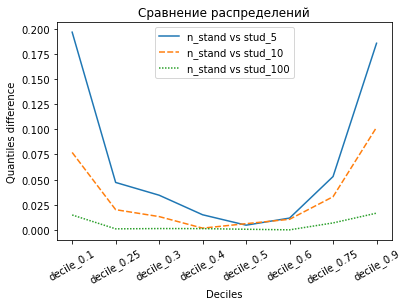

In [15]:
sns.lineplot(data = quantile_dataframe[['n_stand vs stud_5', 'n_stand vs stud_10', 'n_stand vs stud_100']] )
plt.xticks(rotation = 30)
plt.title('Сравнение распределений')
plt.ylabel('Quantiles difference')
plt.xlabel('Deciles')
plt.show()

<div class="alert alert-block alert-warning"> 
В данном примере распределение Стьюдента при возрастании степеней свододы приближается к стандартному нормальному распределению, хвосты становятся всё более идеальными, относительно ст.норм.распределения.
</div>

### Сравнение Normal distribution и Chi-squared distribution  с разной степенью свободы 

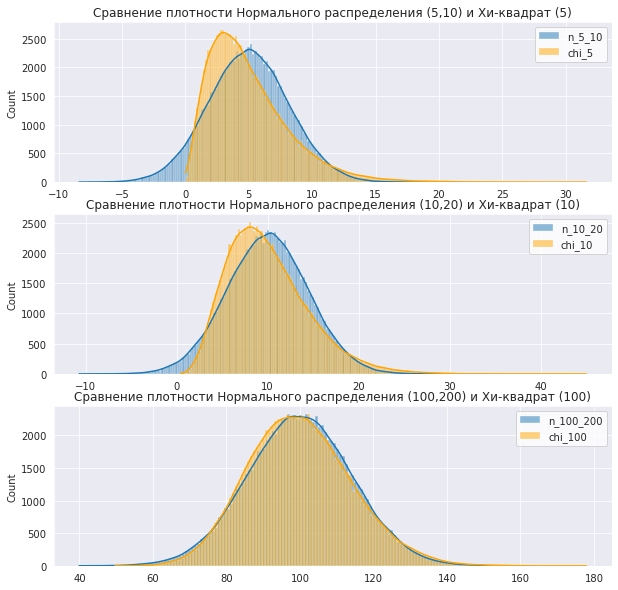

In [16]:
plt.figure(figsize=(10,10))
with sns.axes_style("darkgrid"):

    plt.subplot(311)
    ax = sns.histplot(n_5_10, kde = True, label = 'n_5_10')
    ax = sns.histplot(chi_5, kde = True, label = 'chi_5', color = 'orange')
    ax.legend().get_frame().set_facecolor("white")
    ax.set_title('Сравнение плотности Нормального распределения (5,10) и Хи-квадрат (5)')
    # ax.set_xlim(-10, 25)

    plt.subplot(312)
    ax = sns.histplot(n_10_20, kde = True, label = 'n_10_20')
    ax = sns.histplot(chi_10, kde = True, label = 'chi_10', color = 'orange')
    ax.legend().get_frame().set_facecolor("white")
    ax.set_title('Сравнение плотности Нормального распределения (10,20) и Хи-квадрат (10)')

    plt.subplot(313)
    ax = sns.histplot(n_100_200, kde = True, label = 'n_100_200')
    ax = sns.histplot(chi_100, kde = True, label = 'chi_100', color = 'orange')
    ax.legend().get_frame().set_facecolor("white")
    ax.set_title('Сравнение плотности Нормального распределения (100,200) и Хи-квадрат (100)')
    
plt.show()

<div class="alert alert-block alert-warning"> 
Хи-квадрат сходится к нормальному распределению у которого мат.ожидание  - количество степеней свободы этого хи-квадрата.
</div>